# FINAL ASSIGNMENT MARIO ADITYA

In [1]:
# Import pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import csv
 
# open .tsv file, read data

#with open("amazon_Shoes.tsv",'r',encoding="utf8") as csvfile:
 #   data_shoes = list(csv.reader(csvfile, delimiter=' '))
 #   data_shoes['col'] = data_shoes['col'].apply(lambda x: x in [0,1])

# printing data line by line
 #   size = 0
 #   df={}
 #   for line in data_shoes:
  #      size = size+1
       # if(size>=3):
     #       df[size] = pd.DataFrame(line)
     #   if(size<10):
       #     print(line)
        
data = pd.read_csv(r'amazon_reviews_us_Shoes_v1_00.tsv',sep='\t', error_bad_lines=False)



C:\Users\mario.aditya\AppData\Local\Temp\ipykernel_18848\1048090518.py:29: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(r'amazon_reviews_us_Shoes_v1_00.tsv',sep='\t', error_bad_lines=False)
b'Skipping line 54101: expected 15 fields, saw 22\nSkipping line 55857: expected 15 fields, saw 22\nSkipping line 60448: expected 15 fields, saw 22\n'
b'Skipping line 76918: expected 15 fields, saw 22\nSkipping line 87925: expected 15 fields, saw 22\nSkipping line 88500: expected 15 fields, saw 22\nSkipping line 114276: expected 15 fields, saw 22\nSkipping line 128751: expected 15 fields, saw 22\n'
b'Skipping line 136095: expected 15 fields, saw 22\nSkipping line 140007: expected 15 fields, saw 22\nSkipping line 177148: expected 15 fields, saw 22\nSkipping line 180087: expected 15 fields, saw 22\nSkipping line 183010: expected 15 fields, saw 22\nSkipping line 183949: expected 15 fields,

In [5]:
data.head(20)


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,18069663,R3P2HIOQCIN5ZU,B000XB31C0,265024781,Minnetonka Men's Double Deerskin Softsole Mocc...,Shoes,1,0,0,N,Y,.,Do not buy: really didn't start to wear them u...,2015-08-31
1,US,16251825,R12VVR0WH5Q24V,B00CFYZH5W,259035853,Teva Men's Pajaro Flip-Flop,Shoes,5,0,0,N,Y,super flip flop,provides great cushion as well as archsupport,2015-08-31
2,US,20381037,RNCCKB6TV5EEF,B00S8JNN3Q,666066660,Anne Klein Perfect Pair Wristlet,Shoes,4,0,0,N,Y,Great clutch purse!,It's perfect if you need something small for c...,2015-08-31
3,US,108364,R2NZXYIVCGB13W,B00XFBPOQG,448483263,adidas Men's 10K Lifestyle Runner Sneaker,Shoes,5,0,6,N,Y,Badass,Getting what u see,2015-08-31
4,US,45449350,R2EQ1TG9IT3OEQ,B00SW64Y9W,7853171,OverBling Sneakers for Men Casual Men Shoes Ge...,Shoes,3,0,0,N,Y,Three Stars,small,2015-08-31
5,US,19324665,R1WXA9JSC2H1U1,B011F9E6LI,14311457,MESSI 15.3 FG/AG SOCCER SHOES (8.5),Shoes,5,1,1,N,Y,Five Stars,My 13 year old son loved these shoes excellent...,2015-08-31
6,US,50073594,R12ENYLFGGNWRV,B00HAUP1OI,264821602,Hoka One One Men's Stinson Lite Shoe,Shoes,5,1,1,N,Y,"Finally, some cushion to write about","Ok, I have been searching for shoes to replace...",2015-08-31
7,US,21706057,R2R07E5PNXEUO5,B00L1RKOKW,767118055,Olukai Nohea Mesh Shoe - Men's,Shoes,4,0,0,N,Y,"good deal, but had to go a FULL size down",I went a full size down and they fit better bu...,2015-08-31
8,US,13708216,R27BA52AKWMWN3,B005WA9MSE,813856438,"Carolina Mens 6"" Waterproof Broad Composite To...",Shoes,5,0,0,N,Y,... would have to say this is boot is very goo...,I would have to say this is boot is very good ...,2015-08-31
9,US,40542649,RLF8DOID2KD5O,B00BEYQI5C,661491213,Alegria Women's Seville Clog,Shoes,3,0,0,N,Y,Too small,The size is misleading!,2015-08-31


In [7]:
rating = ['low','neutral','high']

def rating_y(y):
    if y<=2:
        return rating[0]
    elif y>=4:
        return rating[2]
    else:
        return rating[1]


data['rating_cat'] = data['star_rating'].apply(rating_y)


data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,rating_cat
0,US,18069663,R3P2HIOQCIN5ZU,B000XB31C0,265024781,Minnetonka Men's Double Deerskin Softsole Mocc...,Shoes,1,0,0,N,Y,.,Do not buy: really didn't start to wear them u...,2015-08-31,low
1,US,16251825,R12VVR0WH5Q24V,B00CFYZH5W,259035853,Teva Men's Pajaro Flip-Flop,Shoes,5,0,0,N,Y,super flip flop,provides great cushion as well as archsupport,2015-08-31,high
2,US,20381037,RNCCKB6TV5EEF,B00S8JNN3Q,666066660,Anne Klein Perfect Pair Wristlet,Shoes,4,0,0,N,Y,Great clutch purse!,It's perfect if you need something small for c...,2015-08-31,high
3,US,108364,R2NZXYIVCGB13W,B00XFBPOQG,448483263,adidas Men's 10K Lifestyle Runner Sneaker,Shoes,5,0,6,N,Y,Badass,Getting what u see,2015-08-31,high
4,US,45449350,R2EQ1TG9IT3OEQ,B00SW64Y9W,7853171,OverBling Sneakers for Men Casual Men Shoes Ge...,Shoes,3,0,0,N,Y,Three Stars,small,2015-08-31,neutral


In [8]:
data_shoes=data.drop(['marketplace', 'review_id',
                      'product_id','product_parent',
                      'product_category','helpful_votes',
                       'total_votes','vine',
                       'verified_purchase','review_headline',
                     'review_date','customer_id',
                      'product_title',], axis=1)

In [9]:
data_shoes1=data_shoes.head(50000)
data_shoes1.head(5)

,star_rating,review_body,rating_cat
0,1,Do not buy: really didn't start to wear them u...,low
1,5,provides great cushion as well as archsupport,high
2,4,It's perfect if you need something small for c...,high
3,5,Getting what u see,high
4,3,small,neutral


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

stemmer = SnowballStemmer("english")
tokenizer = RegexpTokenizer("[a-z']+")

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [stemmer.stem(t) for t in tokens] 

def get_tf(data_shoes1, use_idf, max_df=1.0, min_df=1, ngram_range=(1,1)):
    if use_idf:
        m = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    else:
        m = CountVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    
    d = m.fit_transform(data_shoes1.values.astype('U'))
    
    return m, d

tf_m, tf_d = get_tf(data_shoes1['review_body'], use_idf=False, max_df=0.90, min_df=10)
tfidf_m, tfidf_d = get_tf(data_shoes1['review_body'], use_idf=True, max_df=0.90, min_df=10)



C:\Users\mario.aditya\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


In [11]:

n_topics = 10

def get_lda(data_shoes1, topics):
    m = LatentDirichletAllocation(n_components=topics, n_jobs=-1, learning_method='online').fit(data_shoes1)
    d = m.transform(data_shoes1)
    return m, d

def get_kmeans(data_shoes1, k, scale=True):
    if scale:
        s = MinMaxScaler()
        data = s.fit_transform(data_shoes1)
    
    m = KMeans(n_clusters=k).fit(data_shoes1)
    d = m.predict(data_shoes1)
    return m, d        

lda_m, lda_d = get_lda(tf_d, n_topics)
kmean_m, kmean_d = get_kmeans(tfidf_d, n_topics, scale=False)


In [12]:
def show_topics(model, feature_names, n_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_words - 1:-1]]))
    print()
    
def show_cluster_topics(cluster_labels, tf_matrix, feature_names, n_words):
    d = pd.DataFrame(tf_matrix.toarray())
    d['c'] = cluster_labels
    d = d.groupby('c').sum().T
    
    for col in d:
        top_n = d[col].nlargest(n_words).index.tolist()
        print("Cluster #%d:" % col)
        print(", ".join([feature_names[i]
                for i in top_n]))
    print()
    
print("Top 15 stemmed words per topic in LDA model\n")
show_topics(lda_m, tf_m.get_feature_names(), 15)

Top 15 stemmed words per topic in LDA model

Topic #0:
size, order, fit, shoe, small, run, littl, return, big, perfect, wear, narrow, wide, bit, half
Topic #1:
great, price, qualiti, good, product, glass, expect, thank, awesom, fit, look, ship, amazon, said, fast
Topic #2:
shoe, feet, wear, support, day, foot, walk, comfort, arch, time, old, son, year, long, good
Topic #3:
use, tri, time, materi, new, think, brand, onli, work, came, don't, water, make, regular, alreadi
Topic #4:
br, shoe, boot, wear, work, buy, toe, heel, day, pair, onli, becaus, just, best, right
Topic #5:
great, shoe, veri, comfort, fit, good, love, perfect, look, daughter, excel, recommend, beauti, coupl, high
Topic #6:
love, cute, sandal, shoe, super, color, bought, wish, compliment, worth, comfort, got, ok, wear, lot
Topic #7:
like, realli, veri, look, comfort, i'm, feel, they'r, happi, don't, light, slip, becaus, want, make
Topic #8:
nice, bag, color, look, veri, strap, like, purs, br, just, sunglass, pictur, wan

C:\Users\mario.aditya\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
print("Top 15 stemmed words per cluster in Kmeans model\n")
show_cluster_topics(kmean_d, tfidf_d, tfidf_m.get_feature_names(), 15)

Top 15 stemmed words per cluster in Kmeans model

Cluster #0:
good, veri, shoe, qualiti, product, look, fit, price, comfort, expect, servic, feel, great, far, pretti
Cluster #1:
love, like, fit, veri, look, boot, great, pair, expect, excel, just, comfort, wear, bag, color
Cluster #2:
comfort, veri, shoe, love, fit, great, stylish, happi, wear, sandal, look, day, good, light, super
Cluster #3:
shoe, wear, comfort, love, feet, day, pair, great, fit, veri, like, walk, support, look, good
Cluster #4:
nice, veri, shoe, look, comfort, fit, price, good, qualiti, love, boot, realli, great, small, expect
Cluster #5:
love, shoe, son, daughter, comfort, boot, color, sandal, bag, pair, beauti, comfi, fit, just, buy
Cluster #6:
cute, super, veri, comfort, love, shoe, comfi, realli, fit, wear, great, boot, small, price, littl
Cluster #7:
great, shoe, fit, price, look, product, love, boot, comfort, qualiti, buy, feel, work, sandal, pair
Cluster #8:
perfect, fit, love, shoe, comfort, size, great, veri

In [14]:
def get_svd(data_shoes1, components):
    svd = TruncatedSVD(n_components=components).fit(data_shoes1)
    o = pd.DataFrame(svd.transform(data_shoes1), columns=range(0,components))
    return svd,o

def get_tsne(data_shoes1, components, perplexity):
    tsne = TSNE(n_components=components, perplexity=perplexity, n_iter=1000)
    o = pd.DataFrame(tsne.fit_transform(data_shoes1), columns=range(0,components))
    return tsne,o

svd_v, svd_m = get_svd(tfidf_d, 50)
tnse_v, tsne_m = get_tsne(svd_m, 2, 25)

lda_c = lda_d.argmax(axis=1)

C:\Users\mario.aditya\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mario.aditya\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

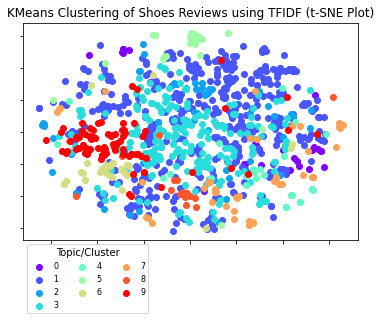

In [15]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

def plot_scatter_2d(x, y, c, sample_size, title):
    df = pd.DataFrame({'x': x, 'y': y, 'c': c}).sample(sample_size)
    l = len(np.unique(c))
    
    ax = plt.subplot(111)
    colors = cm.rainbow(np.linspace(0, 1, l))
                                   
    for c in range(0,l):
        qq = df[df['c']==c]
        ax.scatter(qq['x'], qq['y'],c=colors[c], label=c)
    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), title='Topic/Cluster')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(title)
    plt.show()

%matplotlib inline
plot_scatter_2d(tsne_m[0], tsne_m[1], kmean_d, 1000, 'KMeans Clustering of Shoes Reviews using TFIDF (t-SNE Plot)')




*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

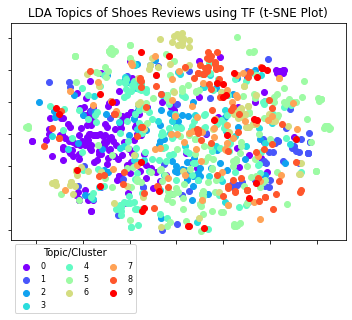

In [16]:
%matplotlib inline
plot_scatter_2d(tsne_m[0], tsne_m[1], lda_c, 1000, 'LDA Topics of Shoes Reviews using TF (t-SNE Plot)')

In [17]:

X_train, X_test, y_train, y_test = train_test_split(tfidf_d, 
                                                    data_shoes1['rating_cat'], 
                                                    test_size=0.3)



In [27]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [28]:
def calculate_cv(X, y):
    results = {
        'lr': [],
        'svm': [],
        'nb': [],
        'combined': []
    }
    lm = LogisticRegression()
    svm = LinearSVC()
    nb = MultinomialNB()
    vc = VotingClassifier([('lm', lm), ('svm', svm), ('nb', nb)])
    
    for c in rating:
        y_adj = np.array(y==c)
        results['lr'].append((cross_val_score(lm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['svm'].append((cross_val_score(svm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['nb'].append((cross_val_score(nb, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['combined'].append((cross_val_score(vc, X, y_adj, cv=10, scoring='accuracy').mean(), c))
    return results

cv_scores = calculate_cv(X_test, y_test)

print("Model accuracy predictions\n")
for m,s in cv_scores.items():
    for ss in s:
        print("{M} model ({R} rating): {S:.1%}".format(M=m.upper(), R=ss[1], S=ss[0]))
    print()

Model accuracy predictions

LR model (low rating): 91.4%
LR model (neutral rating): 91.1%
LR model (high rating): 87.4%

SVM model (low rating): 91.9%
SVM model (neutral rating): 90.6%
SVM model (high rating): 86.9%

NB model (low rating): 89.9%
NB model (neutral rating): 91.1%
NB model (high rating): 84.2%

COMBINED model (low rating): 91.6%
COMBINED model (neutral rating): 91.1%
COMBINED model (high rating): 87.2%



In [29]:
def get_lr(x, y):
    models = []
    for c in rating:
        y_adj = np.array(y==c)
        lm = LogisticRegression()
        lm_f = lm.fit(x, y_adj)
        models.append(lm_f)
    return models

lr_m = get_lr(X_train, y_train)

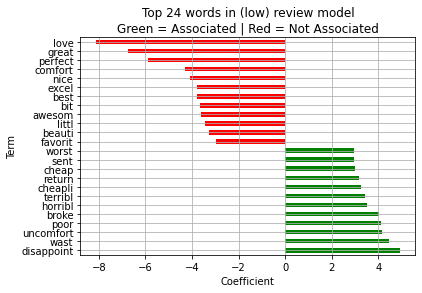

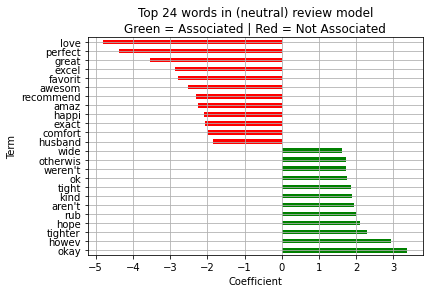

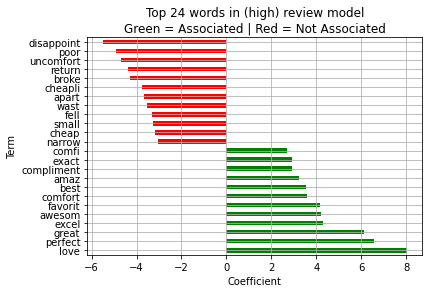

In [61]:
%matplotlib inline

def plot_coef(title, model, feature_names, n_words):
    v = []
    for topic_idx, topic in enumerate(model.coef_):
        [v.append([feature_names[i], model.coef_.item(i)]) for i in topic.argsort()[:-n_words - 1:-1]]
        [v.append([feature_names[i], model.coef_.item(i)]) for i in topic.argsort()[0:n_words]]
    df = pd.DataFrame(v, columns=['Term','Coefficient']).sort_values(by='Coefficient',ascending=False)
    df['c'] = df['Coefficient']>0
    ax = df.plot(x='Term', y='Coefficient', kind='barh', color=df['c'].map({True: 'g', False: 'r'}), grid=True, legend=False,
           title=title)
    ax.set_xlabel("Coefficient")

n_terms = 12
for c in range(0,len(rating)):
    plot_coef('Top {N} words in ({R}) review model\nGreen = Associated | Red = Not Associated'.format(N=n_terms*2, R=rating[c]), 
              lr_m[c], tfidf_m.get_feature_names(), n_terms)

In [30]:
def test_review(text):
    test_str = [text]
    test_new = tfidf_m.transform(test_str)

    print('Review text: "{R}"\n'.format(R=test_str[0]))
    print('Model Prediction')
    for m in range(0,3):
        print('Model ({M}): {P:.1%}'.format(M=rating[m], P=lr_m[m].predict_proba(test_new)[0][1]))
        

In [34]:

test_review('I bought a adidas shoes but wrong size. I returned it when it arrived.')



Review text: "I bought a adidas shoes but wrong size. I returned it when it arrived."

Model Prediction
Model (low): 58.2%
Model (neutral): 15.3%
Model (high): 26.1%


In [32]:

test_review('I really like a nike shoes, so comfort, and the price was cheap I am glad to bought it')



Review text: "I really like a nike shoes, so comfort, and the price was cheap I am glad to bought it"

Model Prediction
Model (low): 9.5%
Model (neutral): 4.4%
Model (high): 80.5%


In [33]:
test_review('the shoes is so uncomfortable to wear')


Review text: "the shoes is so uncomfortable to wear"

Model Prediction
Model (low): 88.8%
Model (neutral): 10.3%
Model (high): 5.3%
